# Introduction to Seaborn

Data visualization is fundamental because it allows to communicate findings more easily. If you completed the lectures (**we expect you to have completed all the lectures before the start of M3**), then you will have already some basic understanding of how to make plots using the package *matplotlib*. Here we will make a step forward, and we will learn about slightly more complex plots that can be made using the seaborn package. 

The first two things you need to do is to download the seaborn package and then import it.

In [ ]:
! pip install seaborn

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Seaborn gives a lot of flexibility in terms of the type of plots that can be made, as well as the different combinations of plots tha can be created. It is characterized by two different sent of functions, that are defined as`figure-level` and `axis-level`. The most important thing to know about them is that `figure-level` functions (e.g. catplot, displot and relplot) can be considered similar to a wrapper or unique interface that allows to plot all the `axis-level` plots that belong to the same group (check Figure).

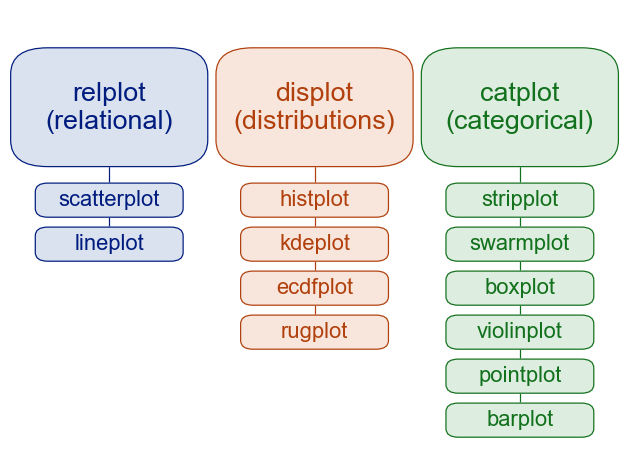

In this tutorial, we will go through some of the most relevant types of plots, but of course you are more than welcome to check the full tutorial [here](https://seaborn.pydata.org/tutorial/introduction.html)

## Style and Themes

The first function that we will learn from seaborn is how to change the style or theme of plots. The style and theme needs to be set only once in the Notebook, and then all the following plots will follow the selected theme and style. In order to be able to set a specific theme or style, you can use the following commands:

1.  `sn.set_theme(....) `: and select among *poster, talk, notebook, paper*. As you can understand from the names - the set_theme function mainly specifies the general sizes of the figure.
2. `sn.set_style(....) `: and select among *white, dark, whitegrid, darkgrid, ticks*. This function, instead, regulates the general background colour.

Try to check out the different styles and themes available in seaborn and select those that you prefer. To check them out, simply change the name in the parenthesis and then run the following chunk of code, which recreates a simply boxplot (we will talk more in details about how to create the plot itself later on in the lecture, so don't worry about that now).

**IMPORTANT**: When you define the style and theme, make sure to specify first the theme and then the style. The theme function has already some default styles, so if it is run later it will overwrite the style that you selected.

In [66]:
sn.set_theme("talk")

In [67]:
sn.set_style("white")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

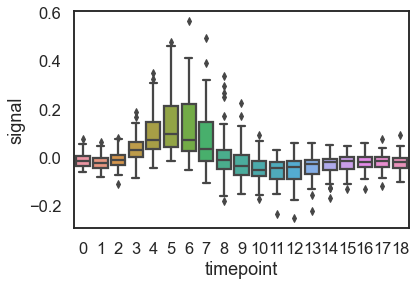

In [68]:
fmri = sn.load_dataset("fmri")
sn.boxplot(x="timepoint", y="signal", data = fmri)

## Categorical data: distribution plots

Now that we know how to set the general style and theme of plots, we can move one learning how to create different plots. 

If you remember from the previous lecture, two good way to represent categorical data was through boxplots and barplots. Let's try to load a standard dataset (already cleaned, that is part of the seaborn library), that provides information about different brain activation registered during an fmri tasks. The data were collected across different timepoints, in different brain regions, for different subjects. Let's try to visualise the data to understand their meaning.

In [70]:
fmri = sn.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


If you remember from the previous lecture, matplotlib takes as input the column for which you want to create the boxplpot. If you wanted to create many boxplots next to each other, you had to provide as input a list. Seaborn, on the other hand has much more flexibility in terms of what you can do.

The basic three input arguments are *x*, the *y* and *data*, which specify respectively the names of the columns that you want in the x and y, and then the name of the dataframe to which these columns belong.

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

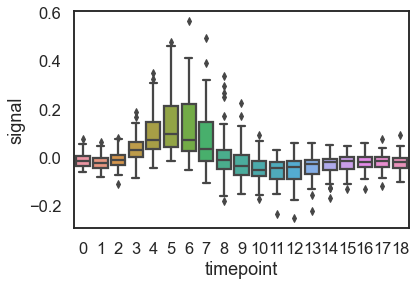

In [83]:
sn.boxplot(x="timepoint", y="signal", data = fmri)

In addition, it is possible to add an extra argument that specifies whether the colour should have any meaning. For example, we can create a boxplot, in which we separate the signal values between the two brain regions studied. This argument is called *hue* and takes as input the name of the column of the dataframe that has information about the categories that you what to split the boxplots with.

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

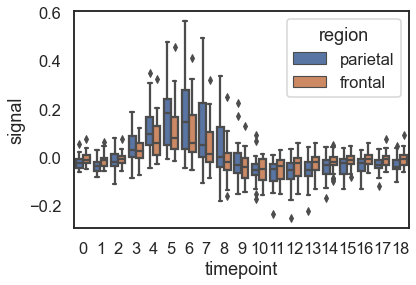

In [72]:
sn.boxplot(x="timepoint", y="signal", data = fmri, hue = 'region')

Let's say that you like the plot but not the colour... seaborn has a lot of flexibility in terms of which colours you can use in your plots. There are three different types of colour `palette`: `diverging` which are mainly useful for data that are interesting when there are low and high values (e.g. correlations), `sequential` that should be used mainly when you have categories that have ordered meanings (e.g. different education levels) and `qualitative` that is mainly for categories with different and not ordered values. In the Figure below you can see a summary of the most important palettes available in seaborn.

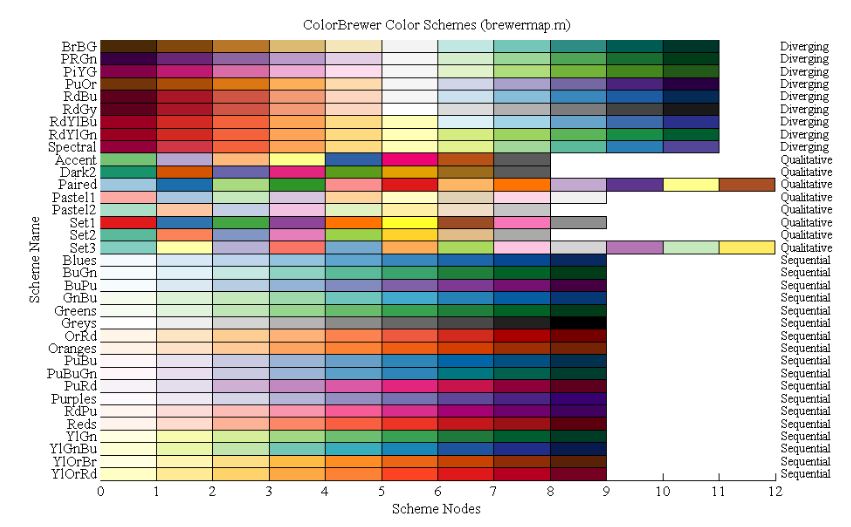

To visualise the colours more in details, you can just write the name of the palette on the left in the following comand.

In [75]:
sn.color_palette("Accent")

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4)]

Once you decided what your final palette will be, you can just set it as default for the entire notebook.

In [76]:
sn.set_palette("Accent")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

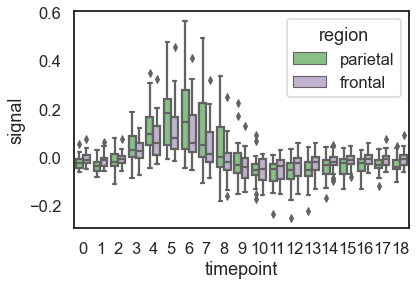

In [82]:
sn.boxplot(x="timepoint", y="signal", data = fmri, hue = 'region')

Of course with this approach there are two limitations: you cannot choose the exact colours from the palette that will be used in the image (the collur palette tends to have more colours than those you need) and you cannot use different palettes for each plot. In order to address these two limitations, seaborn allows for some additional flexibility. It is indeed possible to specify the name of the palette within each plotting function, in order to use a different palette for each plot. 

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

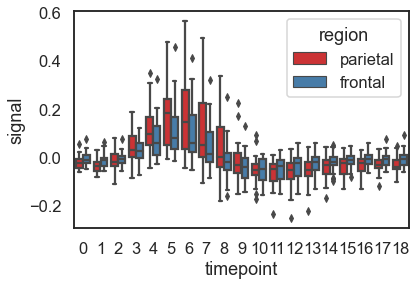

In [79]:
sn.boxplot(x="timepoint", y="signal", data = fmri, hue = 'region', palette = "Set1")

If you want to select specific columns instead, you can look at this [website](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3), set the criteria that you want your colours to respect, copy the **HEX** value of the colours you are interested in, and then provide them in the plotting function as a list.

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

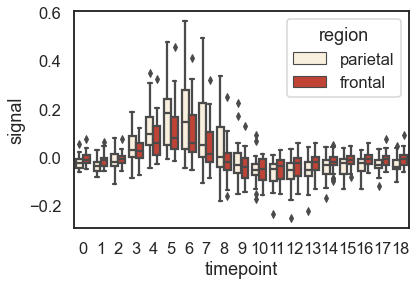

In [80]:
sn.boxplot(x="timepoint", y="signal", data = fmri, hue = 'region', palette = ['#fef0d9','#d7301f'])

Now that we are familiar with choosing different cololur palettes, we can move to slightly more complex plots. A slightly more advanced version of boxplots that can be created in *seaborn* is violin plots, which combines the information contained in boxplots with information about kernel distribution (e.g. the distribution of the values within the interquantile range). *Violinplots* can be created exactly in the same way as boxplots, with the difference that the main command is `violinplot`.

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

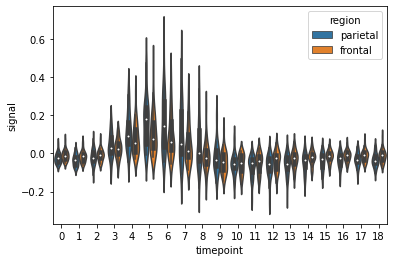

In [18]:
sn.violinplot(x="timepoint", y="signal", data = fmri, hue = 'region')

The plot as it is is really hard to visualize because of the dimensions. The good think about seaborn is that you can use all the commands from `matplotlib` to modify the aesthetics of the plots. 

-------------------
### Code here

Try to change the:
1. Size
2. Title
3. X label and Y label 

Using the commands you learnt in the previous lecture

Once you have done that - try to write a funcion that takes as input the (name of the dataframe, column for x, column for y, column for hue, palette) and plots the boxplot. The function should include as aesthetic information that the x axis are rotated of 45 degrees (check the function `plt.xticks` using the `help` command). Run the function on the songs dataset to plot the loudness of songs divided by genre (The songs data are inside the folder *Data*, make sure to write the right path when importing the data).

NB: The function should work even if you don't provide any argument for hue and/or for palette.

In [7]:
# CODE HERE


-------------

Another commonly used plot for categorical data, if you remember from the previous lecture, is barplots. Barplots in seaborn are created exactly in the same way as boxplots with the only difference that the command is `barplot` instead of `boxplot`.

-------------------
### Code here

Try to recreate the plot above, but this time make a barplot instead of a boxplot. Make sure to specify a big enough size of the figure.
If you did it correctly, you will notice that one of the strengths of seaborn is that, when plotting a barplot, it automatically adds a of confidence interval using bootstrapping.

Now try to add the argument `dodge = False`. What happens?

Now try to add the argument `ci = False`. What happens now?

The ci argument is really useful because it allows you to modify the type of errorbars that you want to see in your barplots. Let's say you want to plot the standard deviation instead of the confidence interval. What do you think you should set `ci` equal to?

In [88]:
# CODE HERE


-------------

In [ ]:
A further advantage of 

## Categorical data: distribution plots

Another interesting feature of seaborn is that it allows you to plot scatterplots for categorical data vs numerical data.

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

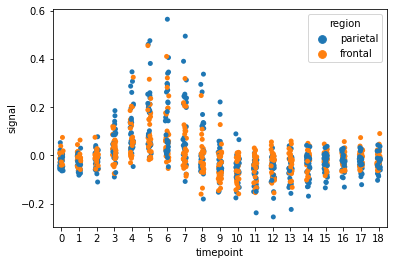

In [43]:
sn.stripplot(x="timepoint", y="signal", data = fmri, hue = "region")

## Catplot wrapper

All the plots mentioned above can be implemented using a unique `wrapper` in the seaborn package called `catplot` by simply specifying the argument `kind`. The advantages of using catplot over the other functions is that is has more options on how the figures can be made. For example, if you split the values based on the hue, you can decide to simply have two separate plots, rather than all bars together, by using the argument `row`. Then, you can specify whether you want common axis using `sharex` or `sharey`. These are just two examples on the easy-to-use extra features of `carplot`.

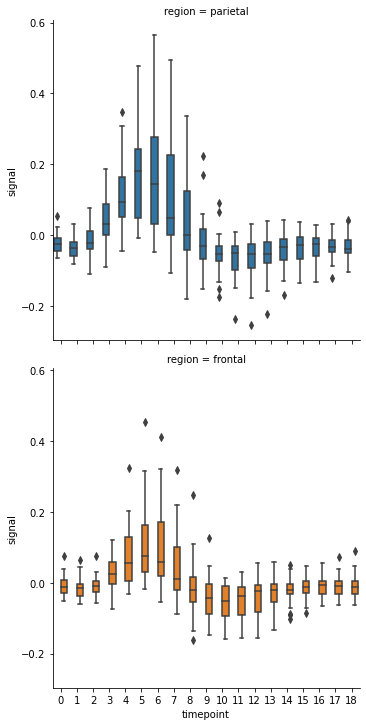

In [39]:
sn.catplot(x="timepoint", y="signal", data = fmri, hue = 'region', kind = "box", row = "region")

Here a summary of the most relevant *kinds* available with the *catplot* wrapper:

| General function | Catplot kind | 
| :---: | :---: |
| boxplot | box |
| violinplot | violin |
| barplot| bar |
| countplot | count|
| pointplot | point |
| scatterplot | scatter |
| lineplot | line |
